In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
plt.rc('figure',dpi=100);

In [3]:
vistas = pd.read_csv("../Data/datos_navent_fiuba/fiuba_3_vistas.csv");
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [4]:
vistas['timestamp']=vistas['timestamp'].astype('datetime64[ns]');
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


In [5]:
vistas.dtypes

idAviso                  int64
timestamp       datetime64[ns]
idpostulante            object
dtype: object

In [6]:
vistas['dia']=pd.DatetimeIndex(vistas['timestamp']).day;
vistas['mes']=pd.DatetimeIndex(vistas['timestamp']).month;
vistas['semana']=pd.DatetimeIndex(vistas['timestamp']).week;
vistas['diadelasemana']=pd.DatetimeIndex(vistas['timestamp']).weekday;
vistas['hora']=pd.DatetimeIndex(vistas['timestamp']).hour;
dias_de_la_semana={0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
vistas['diadelasemana'].replace(dias_de_la_semana, inplace=True)
vistas.head(10)

,idAviso,timestamp,idpostulante,dia,mes,semana,diadelasemana,hora
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,23,2,8,Viernes,18
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,23,2,8,Viernes,18
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,23,2,8,Viernes,18
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,23,2,8,Viernes,18
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,23,2,8,Viernes,18
5,1112355613,2018-02-23 18:38:23.467,rmdWApz,23,2,8,Viernes,18
6,1112346704,2018-02-23 18:38:27.130,Dr6e6Xl,23,2,8,Viernes,18
7,1112282610,2018-02-23 18:38:27.670,A3R9GWl,23,2,8,Viernes,18
8,1112342544,2018-02-23 18:38:31.601,8M24rbM,23,2,8,Viernes,18
9,1112358408,2018-02-23 18:38:32.977,YjrD1ZZ,23,2,8,Viernes,18


In [7]:
vistas_febrero=vistas[vistas['mes']==2];
vistas_febrero.head()

,idAviso,timestamp,idpostulante,dia,mes,semana,diadelasemana,hora
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,23,2,8,Viernes,18
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,23,2,8,Viernes,18
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,23,2,8,Viernes,18
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,23,2,8,Viernes,18
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,23,2,8,Viernes,18


Text(0,0.5,'Cantidad de Vistas')

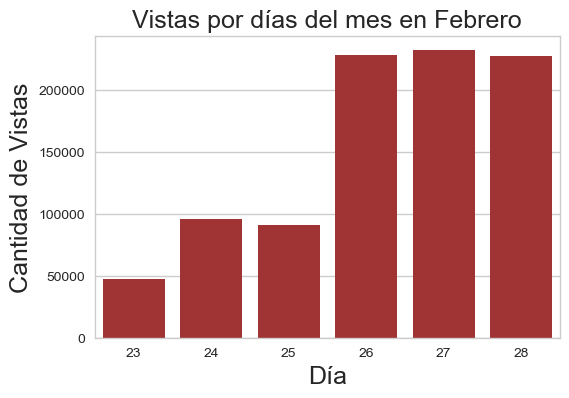

In [8]:
#Podemos ver que hay una periodicidad, y una anomalia en los feriados 12 y 13 de carnaval, pareciera ser que
#los picos en postulaciones son en dias siempre laborables
g = sns.countplot(x=vistas_febrero['dia'], orient='v', palette=['firebrick'])
g.set_title("Vistas por días del mes en Febrero", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Vistas", fontsize=18)

Text(0,0.5,'Cantidad de Vistas')

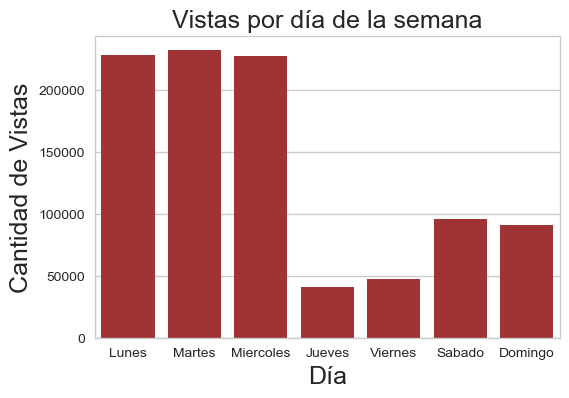

In [9]:
#Periodicidad que se explica con esto
g = sns.countplot(x=vistas['diadelasemana'], orient='v', order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], palette=['firebrick'])
g.set_title("Vistas por día de la semana", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Vistas", fontsize=18)

Text(0,0.5,'Cantidad de Vistas')

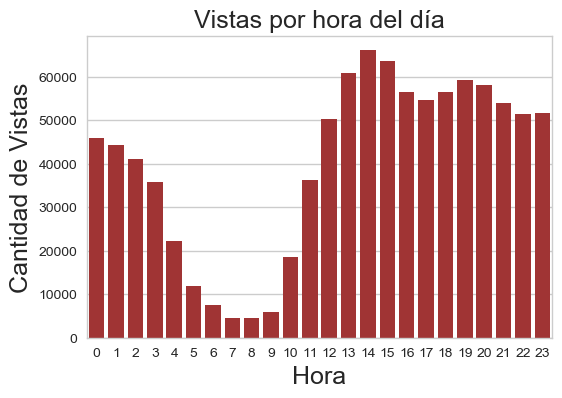

In [12]:
g = sns.countplot(x=vistas['hora'], orient='v', palette=['firebrick'])
g.set_title("Vistas por hora del día", fontsize=18)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Cantidad de Vistas", fontsize=18)

In [14]:
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv");
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [15]:
postulaciones['fechapostulacion']=postulaciones['fechapostulacion'].astype('datetime64[ns]');
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [16]:
postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
dtype: object

In [17]:
postulaciones['dia']=pd.DatetimeIndex(postulaciones['fechapostulacion']).day;
postulaciones['mes']=pd.DatetimeIndex(postulaciones['fechapostulacion']).month;
postulaciones['semana']=pd.DatetimeIndex(postulaciones['fechapostulacion']).week;
postulaciones['diadelasemana']=pd.DatetimeIndex(postulaciones['fechapostulacion']).weekday;
postulaciones['hora']=pd.DatetimeIndex(postulaciones['fechapostulacion']).hour;
dias_de_la_semana={0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
postulaciones['diadelasemana'].replace(dias_de_la_semana, inplace=True)
postulaciones.head(10)

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana,hora
0,1112257047,NM5M,2018-01-15 16:22:34,15,1,3,Lunes,16
1,1111920714,NM5M,2018-02-06 09:04:50,6,2,6,Martes,9
2,1112346945,NM5M,2018-02-22 09:04:47,22,2,8,Jueves,9
3,1112345547,NM5M,2018-02-22 09:04:59,22,2,8,Jueves,9
4,1112237522,5awk,2018-01-25 18:55:03,25,1,4,Jueves,18
5,1112277633,5awk,2018-01-29 13:34:44,29,1,5,Lunes,13
6,1112302347,5awk,2018-02-07 20:49:22,7,2,6,Miercoles,20
7,1112291495,5awk,2018-02-07 20:50:13,7,2,6,Miercoles,20
8,1112304011,5awk,2018-02-07 20:51:15,7,2,6,Miercoles,20
9,1112326289,5awk,2018-02-09 20:24:57,9,2,6,Viernes,20


In [18]:
postulaciones_semana_vistas=postulaciones[(postulaciones['mes']==2) & (postulaciones['dia']>=23) & (postulaciones['dia']<=28)];
postulaciones_semana_vistas.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana,hora
12,1112315188,5awk,2018-02-28 15:54:28,28,2,9,Miercoles,15
13,1112346738,5awk,2018-02-28 15:54:47,28,2,9,Miercoles,15
14,1112330625,5awk,2018-02-28 15:56:43,28,2,9,Miercoles,15
15,1112306543,5awk,2018-02-28 15:57:35,28,2,9,Miercoles,15
16,1112315170,5awk,2018-02-28 15:59:14,28,2,9,Miercoles,15


In [19]:
vistas=vistas[vistas['dia']!=1];

Text(0,0.5,'Cantidad')

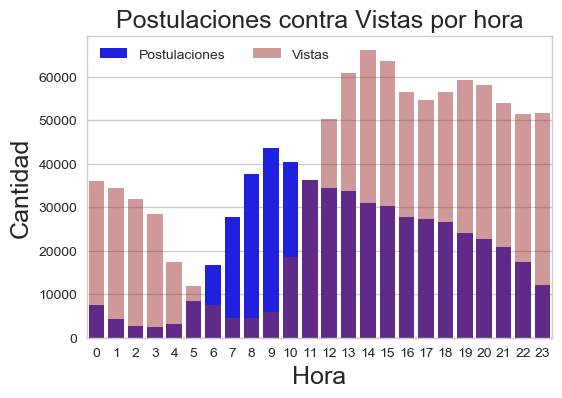

In [23]:
g = sns.countplot(x=postulaciones_semana_vistas['hora'], orient='v', palette=['blue'],alpha=1)
g = sns.countplot(x=vistas['hora'], orient='v', palette=['firebrick'],alpha=0.5)
g.legend(['Postulaciones','Vistas'],ncol=2, loc='upper left');
g.set_title("Postulaciones contra Vistas por hora", fontsize=18)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

Text(0,0.5,'Cantidad')

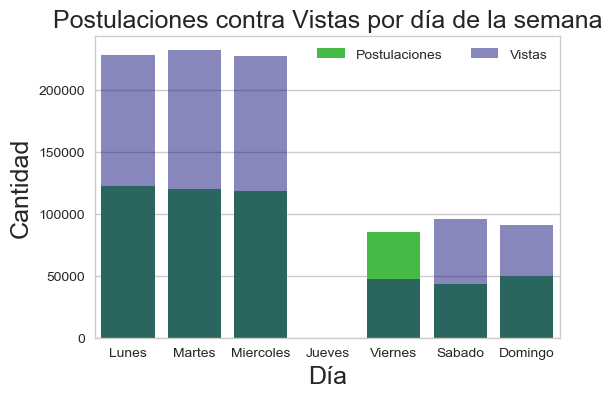

In [19]:
g = sns.countplot(x=postulaciones_semana_vistas['diadelasemana'], orient='v', palette=['limegreen'],order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
g = sns.countplot(x=vistas['diadelasemana'], orient='v', palette=['darkblue'],alpha=0.5,order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
g.legend(['Postulaciones','Vistas'],ncol=2, loc='upper right');
g.set_title("Postulaciones contra Vistas por día de la semana", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

Text(0,0.5,'Cantidad')

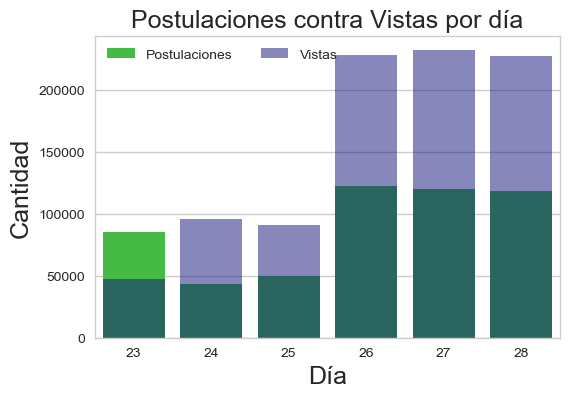

In [20]:
g = sns.countplot(x=postulaciones_semana_vistas['dia'], orient='v', palette=['limegreen'])
g = sns.countplot(x=vistas['dia'], orient='v', palette=['darkblue'],alpha=0.5)
g.legend(['Postulaciones','Vistas'],ncol=2, loc='upper left');
g.set_title("Postulaciones contra Vistas por día", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)